In [1]:
import os

path = "../Images"

if not os.path.exists("../Images"):
    os.makedirs(path)

## Bubble Plot of Ride Sharing Data

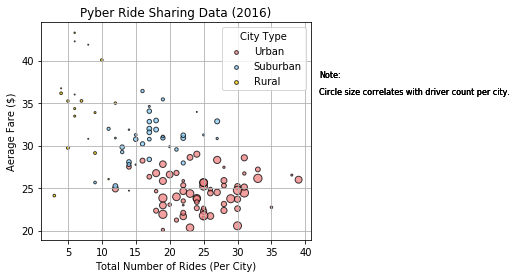

In [2]:
#####################################
### Bubble Plot of Ride Sharing Data
#####################################

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
file_one_df = pd.read_csv(city_data_to_load)
#print(file_one_df.head())        

file_two_df = pd.read_csv(ride_data_to_load)
#print(file_two_df.head())

# Combine the data into a single dataset
combined_data_df = pd.merge(file_two_df, file_one_df,
                                 how='outer', on='city')

# Display the data table for preview
#print(combined_data_df.head())

City_Type=['Urban', 'Suburban', 'Rural']
Facecolors={'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}

# Obtain the x and y coordinates for each of the three city types
for var in City_Type:
    facecolor=Facecolors[var]
    
    s=combined_data_df.loc[combined_data_df['type']==var]

    # Average Fare($)Per City
    Average_fare_per_city = (s.groupby('city').mean())["fare"]
    
    # Total Number of Rides Per City
    Total_number_of_rides_per_city = (s.groupby('city').count())["ride_id"]
    
    #Total Numer of Drivers Per City
    Total_number_of_drivers_per_city = (s.groupby('city').first())["driver_count"]
    
    #print(facecolor)
    
    # Incorporate the other graph property
    # Create a title, x label, and y label for our chart
    plt.title("Pyber Ride Sharing Data (2016)")
    plt.xlabel("Total Number of Rides (Per City)")
    plt.ylabel("Aerage Fare ($)")
    
    # Incorporate a text label regarding circle size
    textstr1="Note:"
    textstr2="Circle size correlates with driver count per city."       
    plt.text(42, 38, textstr1, fontsize=8)
    plt.text(42, 36, textstr2, fontsize=8)
    plt.subplots_adjust(right=0.75)
    
    plt.grid()

    # Build the scatter plots for each city types
    label=plt.scatter(Total_number_of_rides_per_city, Average_fare_per_city, marker="o", facecolors=facecolor, edgecolors="black", s=Total_number_of_drivers_per_city, alpha=0.75)

# Create a legend     
lgnd=plt.legend(City_Type, title="City Type", loc="best")  
for handle in lgnd.legendHandles:
    handle.set_sizes([14.0])
    
# Save Figure
plt.savefig("../Images/city_ride_data.png")



In [3]:
# Show plot
plt.show()

## Total Fares by City Type

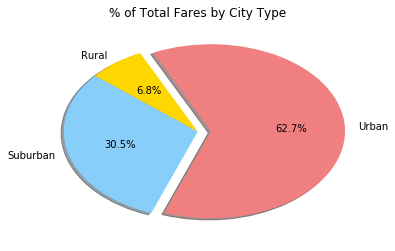

In [4]:
##############################
### Total Fares by City Type
##############################

#Facecolors={'Suburban':'lightskyblue', 'Urban':'lightcoral', 'Rural':'gold'}

### Calculate Type Percents

Total_Fares_per_City_Type=((combined_data_df.groupby('type')).sum())["fare"]
#print(Total_Fares_per_City_Type.head())
    
### Build Pie Chart

# Labels for the sections of our pie chart
labels=["Suburban", "Urban", "Rural"]

# The values of each section of the pie chart
sizes=[Total_Fares_per_City_Type["Suburban"],Total_Fares_per_City_Type["Urban"],Total_Fares_per_City_Type["Rural"]]
#print(sizes)

# The colors of each section of the pie chart
colors = [Facecolors["Suburban"], Facecolors["Urban"], Facecolors["Rural"]]
#print(colors)

explode = (0, 0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

### Save Figure
plt.savefig("../Images/pie_of_total_fares_per_city_type.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

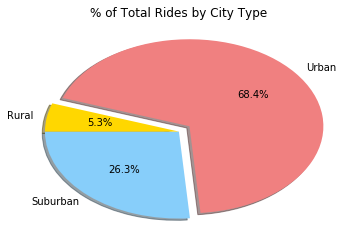

In [6]:
##############################
### Total Rides by City Type
##############################

# Calculate Ride Percents
Total_Rides_per_City_Type=((combined_data_df.groupby('type')).count())["ride_id"]

# Build Pie Chart
# The values of each section of the pie chart
sizes1=[Total_Rides_per_City_Type["Suburban"],Total_Rides_per_City_Type["Urban"],Total_Rides_per_City_Type["Rural"]]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes1, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/pie_of_total_rides_per_city_type.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

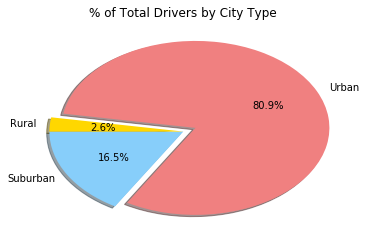

In [8]:
##############################
### Total Drivers by City Type
##############################

# Calculate Driver Percents
Total_Drivers_per_City_Type=((file_one_df.groupby('type')).sum())["driver_count"]

# Build Pie Charts
# The values of each section of the pie chart
sizes2=[Total_Drivers_per_City_Type["Suburban"],Total_Drivers_per_City_Type["Urban"],Total_Drivers_per_City_Type["Rural"]]

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes2, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/pie_of_total_drivers_per_city_type.png")

In [9]:
# Show Figure
plt.show()